In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
import time

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('vaksinasi_tweets.csv' , sep='\t')

In [3]:
df.shape

(2032, 36)

In [4]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1426836401639727108,1426836401639727108,2021-08-15 16:21:22 WIB,2021-08-15,16:21:22,700,1425922556658257923,rusdiarif11,R.A,NaN,"Strategis, Program Vaksinasi Santri di Jawa Ba...",in,[],['https://banten.hallo.id/nusantara/pr-5688852...,[],0,0,0,[],[],https://twitter.com/RusdiArif11/status/1426836...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1426836151164276739,1426836151164276739,2021-08-15 16:20:22 WIB,2021-08-15,16:20:22,700,1210173369708007424,makasarpolsek,Sabhara Polsek Makasar jaktim,NaN,"Minggu 15/08/2021 AIPTU WAWAN,S SAMAPTA polsek...",in,[],[],['https://pbs.twimg.com/media/E80j3lHVEAIsfY0....,0,0,1,[],[],https://twitter.com/MakasarPolsek/status/14268...,False,NaN,1,https://pbs.twimg.com/media/E80j3lHVEAIsfY0.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1426836133967646725,1426728454251159552,2021-08-15 16:20:18 WIB,2021-08-15,16:20:18,700,1342527896598953984,aulia_ahadiadr,Sukseskan Vaksinasi 🥰,NaN,@sdenta Makanya jgn suka anggp anggap kecil or...,in,[],[],[],1,0,0,[],[],https://twitter.com/aulia_ahadiaDr/status/1426...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sdenta', 'name': 'K. S. Dent...",NaN,NaN,NaN,NaN
3,1426836128620064771,1426836128620064771,2021-08-15 16:20:17 WIB,2021-08-15,16:20:17,700,63070483,bharianmy,Berita Harian,NaN,#BHnasional Virus COVID-19 akan terus berada d...,in,[],['https://bit.ly/3g2wyak'],[],0,1,1,['bhnasional'],[],https://twitter.com/bharianmy/status/142683612...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1426836098366410753,1426836098366410753,2021-08-15 16:20:09 WIB,2021-08-15,16:20:09,700,1390522354506158080,ayuniiiputri,Putri ayuniii,NaN,Kunci utama utk mengakhiri pandemi ini ya vaks...,in,[],[],['https://pbs.twimg.com/media/E80j3NIUcAU3Vy6....,0,0,0,"['vaksinasikuatkanimunitas', 'ikhtiaratasipand...",[],https://twitter.com/AyuniiiPutri/status/142683...,False,NaN,1,https://pbs.twimg.com/media/E80j3NIUcAU3Vy6.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
df.tweet[:10]

0    Strategis, Program Vaksinasi Santri di Jawa Ba...
1    Minggu 15/08/2021 AIPTU WAWAN,S SAMAPTA polsek...
2    @sdenta Makanya jgn suka anggp anggap kecil or...
3    #BHnasional Virus COVID-19 akan terus berada d...
4    Kunci utama utk mengakhiri pandemi ini ya vaks...
5                 Di semarang ada croffle gak maniest?
6    @Dnok_Ayu @ganjarpranowo Lha vaksinasi kapan s...
7    Setiap negeri tu tunggu masa je masing2 nak ce...
8    Jelang HUT RI, Polsek Sunggal Laksanakan Vaksi...
9    Kuala Lumpur berjaya mencapai imuniti kelompok...
Name: tweet, dtype: object

In [6]:
df = df.head(50)

## step : translate the tweets to english

In [7]:
def get_english(message):
    analysis = TextBlob(message)
    language = analysis.detect_language()
    if language == 'en':
        return message
    return str(analysis.translate(to='en'))
#     time.sleep(1)
df["translate_tweet"] = df["tweet"].apply(lambda x: get_english(x))

In [8]:
df["translate_tweet"]

0     Strategically, the Santri Vaccination Program ...
1     Sunday 15/08/2021 AIPTU Wawan, S SAMAPTA, Maka...
2     @sdenta That's why I don't like to think that ...
3     #BHnasional COVID-19 virus will continue to be...
4     The main key to ending this pandemic is vaccin...
5        Do you have the sweetest croffles in Semarang?
6     @Dnok_Ayu @ganjarpranowo When will the vaccina...
7     Each state is waiting for the time when each o...
8     Ahead of Indonesia's Independence Day, Sunggal...
9     Kuala Lumpur managed to achieve group immunity...
10    The Kudus Regency Government of Central Java h...
11    Preventing Crowds, TNI/Polri Personnel Help Ar...
12    How to Check Vaccination Status and Download V...
13    Can I Take Painkillers Before Vaccination to P...
14    Abdul Rasyid Foundation Help Kobar Health Offi...
15    How to Register for Covid-19 Vaccination throu...
16    Be careful with the information circulating, f...
17    VIDEO NEWS : MONITOR VACCINATION IMPLEMENT

## step : cleansing the data

In [9]:
import emoji
nltk.download('words')
words = set(nltk.corpus.words.words())

def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet

df['translate_tweet_clean'] = df['translate_tweet'].map(lambda x: cleaner(x))


stop_words = stopwords.words('english')
df['translate_tweet_clean'] = df['translate_tweet_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package words to
[nltk_data]     /Users/priagungkhu/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [10]:
df['translate_tweet_clean'].head(10)

0    Strategically, Santri Vaccination Program West...
1    Sunday 15/08/2021 AIPTU Wawan, S SAMAPTA, Maka...
2    That's I like think people small, finished bio...
3    BHnasional COVID-19 virus continue community i...
4    The main key ending pandemic vaccination, guys...
5                       Do sweetest croffles Semarang?
6    Ayu When vaccination finished throughout Centr...
7    Each state waiting time wants reach 1k. Please...
8    Ahead Indonesia's Independence Day, Sunggal Po...
9    Kuala Lumpur managed achieve group immunity to...
Name: translate_tweet_clean, dtype: object

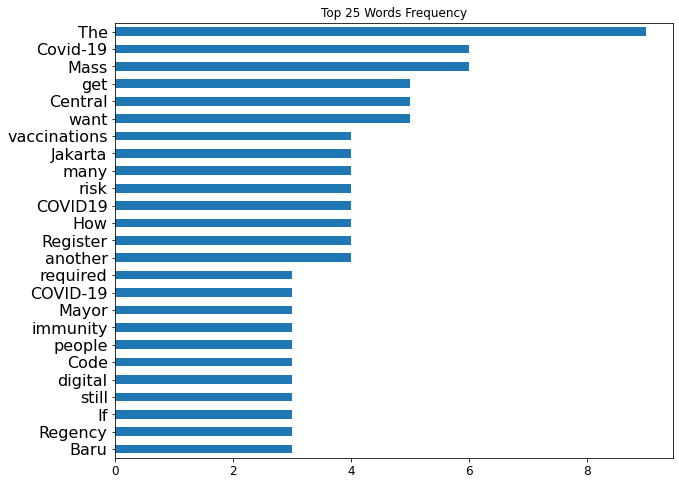

In [11]:
# function to split up words of each tweet
def split(text):
    tweet = text.split() # removes special characters
    return tweet

df['tweet_clean'] = df['translate_tweet_clean'].map(lambda x: split(str(x)))

# acquires word counts
word_freq=df['tweet_clean'].apply(lambda x: pd.value_counts(x)).sum(axis = 0)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16)

imp_word=word_freq.sort_values(ascending=False)[3:28].sort_values(ascending=True)
imp_word.plot(kind = "barh",figsize=(10,8))
plt.title("Top 25 Words Frequency");

## Step : scoring polarity and subjectivity (sentiment)

In [12]:
from textblob import TextBlob
from textblob import Blobber

def get_scores(content):
    blob = TextBlob(content)
    
    return pd.Series({
        'content': content,
        'polarity_score': blob.sentiment.polarity,
        'subjectivity_score': blob.sentiment.subjectivity,
    })

scores = df.translate_tweet_clean.apply(get_scores)

scores.style.background_gradient(cmap='RdYlGn', axis=None, low=0.4, high=0.4)

,content,polarity_score,subjectivity_score
0,"Strategically, Santri Vaccination Program West Java Can Boost Public Trust",0.000000,0.066667
1,"Sunday 15/08/2021 AIPTU Wawan, S SAMAPTA, Makassar Police, East Jakarta, Monitoring Vaccination area ​​kel. Kebon nutmeg, Makassar, East Jakarta,",0.000000,0.000000
2,"That's I like think people small, finished biomedical thesis. ⁇",-0.250000,0.400000
3,BHnasional COVID-19 virus continue community immunity vaccination,0.000000,0.000000
4,"The main key ending pandemic vaccination, guys, us, forget get vaccinated, guys. VaksinasiKuatkanImunitas IkhtiarAtasiPandemi",0.083333,0.666667
5,Do sweetest croffles Semarang?,0.000000,0.000000
6,Ayu When vaccination finished throughout Central Java. At least announced schedule.,-0.150000,0.325000
7,"Each state waiting time wants reach 1k. Please focus vaccines state, Klang Valley !!! Pls act quickly, worry states already bad LK wants speed vaccination rate. Moist damp damp",0.055990,0.341667
8,"Ahead Indonesia's Independence Day, Sunggal Police Conduct Mass Vaccination",0.000000,0.000000
9,Kuala Lumpur managed achieve group immunity today COVID19 vaccination adult population reached 85% - TS MenangBersama LindungDiriLindungSemua,0.100000,0.300000


In [13]:
scores['polarity_score'].mean()

0.04505218704906205

In [14]:
scores['subjectivity_score'].mean()

0.2600018759018759

In [26]:
scores.describe()

,polarity_score,subjectivity_score
count,50.000000,50.000000
mean,0.045052,0.260002
std,0.199608,0.289722
min,-0.600000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.230556
75%,0.095833,0.415000
max,0.750000,1.000000


# step : plot the results

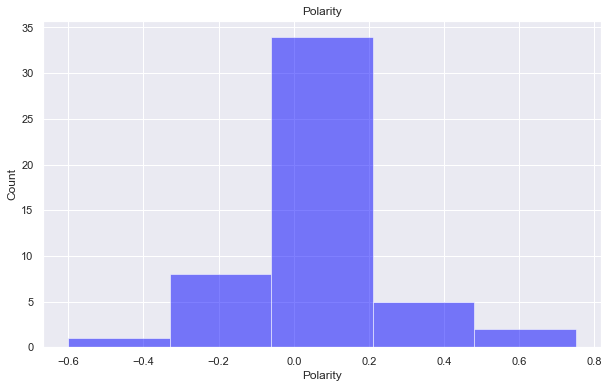

In [27]:
num_bins = 5
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(scores.polarity_score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity')
plt.show()

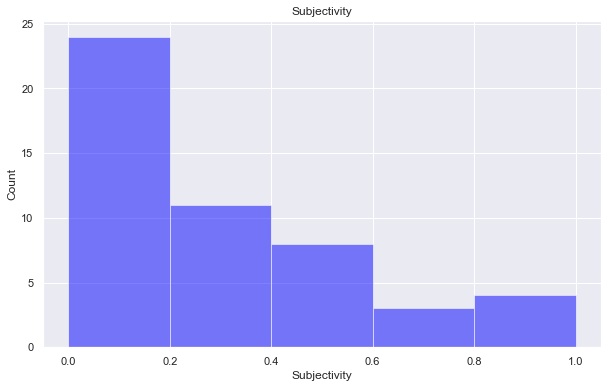

In [29]:
num_bins = 5
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(scores.subjectivity_score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Subjectivity')
plt.show()

In [30]:
scores['sentiment'] = scores['polarity_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [31]:
scores['sentiment'].value_counts()

neutral     23
positive    18
negative     9
Name: sentiment, dtype: int64

In [32]:
scores.head()

,content,polarity_score,subjectivity_score,sentiment,subjectivity
0,"Strategically, Santri Vaccination Program West...",0.000000,0.066667,neutral,objective
1,"Sunday 15/08/2021 AIPTU Wawan, S SAMAPTA, Maka...",0.000000,0.000000,neutral,objective
2,"That's I like think people small, finished bio...",-0.250000,0.400000,negative,objective
3,BHnasional COVID-19 virus continue community i...,0.000000,0.000000,neutral,objective
4,"The main key ending pandemic vaccination, guys...",0.083333,0.666667,positive,subjective


In [33]:
scores['subjectivity'] = scores['subjectivity_score'].apply(lambda x: 'subjective' if x > 0.5 else ('objective' if x < 0.5 else 'neutral'))

In [34]:
scores['subjectivity'].value_counts()

objective     42
subjective     8
Name: subjectivity, dtype: int64

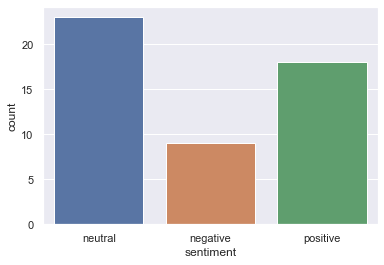

In [35]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="sentiment", data=scores)

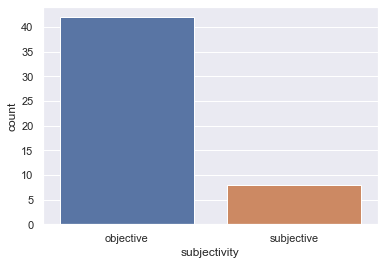

In [36]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="subjectivity", data=scores)